In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from dotenv import load_dotenv

sns.set()

/home/dgarrido/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loda data
df = pd.read_csv("../../data/robos_prose.csv", index_col = 'id_prose', usecols = ['id_prose', 'sin_fecha_siniestro', 'sin_relato'], sep=',', quotechar='"')
df['sin_fecha_siniestro'] = pd.to_datetime(df['sin_fecha_siniestro'])
df['year'] = df.apply(lambda x: x['sin_fecha_siniestro'].year, axis=1)
df.sort_values('sin_fecha_siniestro', inplace=True)

In [3]:
print('Total registros:', len(df))

Total registros: 55626


In [122]:
df_steal_by_year = df.groupby('year').size().reset_index(name='steal_by_year')
df_steal_by_year

,year,steal_by_year
0,1900,1
1,1989,1
2,1990,1
3,1991,2
4,1992,2
5,1993,1
6,1994,2
7,1995,1
8,1996,3
9,1997,6


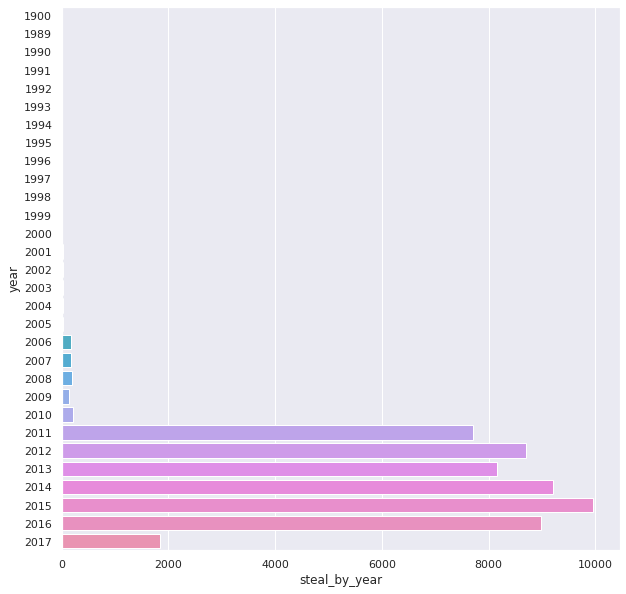

In [123]:
plt.figure(figsize=(10,10))
sns.barplot(y='year', x='steal_by_year', orient='h' , data=df_steal_by_year)

La base de datos esta balanceada entre los años 2011-2016, por tanto, se escogerá este como objetivo del experimento, pues del 2010 hacia atrás solo se cuenta con un una muestra no representativa de los deilitos y del 2017 solo se cuenta con el primer trimestre.

In [124]:
df_sinrelatonull_by_year = df[df['sin_relato'].isnull()==True].groupby('year').size().reset_index(name='sinrelatonull_by_year')
df_sinrelatonull_by_year['steal_by_year'] = df_steal_by_year[df_steal_by_year['year']>=2005].steal_by_year.to_list()
df_sinrelatonull_by_year['%'] = 100*df_sinrelatonull_by_year.sinrelatonull_by_year/df_sinrelatonull_by_year.steal_by_year
df_sinrelatonull_by_year

,year,sinrelatonull_by_year,steal_by_year,%
0,2005,5,30,16.666667
1,2006,100,174,57.471264
2,2007,80,170,47.058824
3,2008,131,188,69.680851
4,2009,44,142,30.985915
5,2010,75,210,35.714286
6,2011,679,7716,8.799896
7,2012,713,8711,8.185053
8,2013,604,8157,7.404683
9,2014,498,9207,5.408928


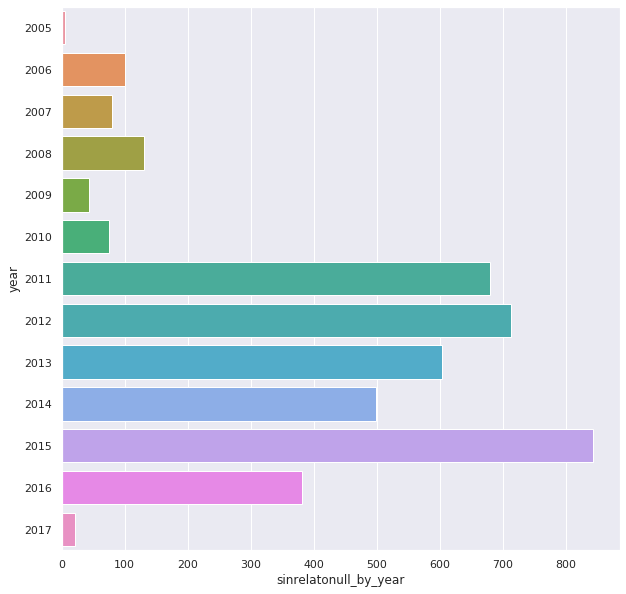

In [125]:
plt.figure(figsize=(10,10))
sns.barplot(y='year', x='sinrelatonull_by_year', orient='h' , data=df_sinrelatonull_by_year)

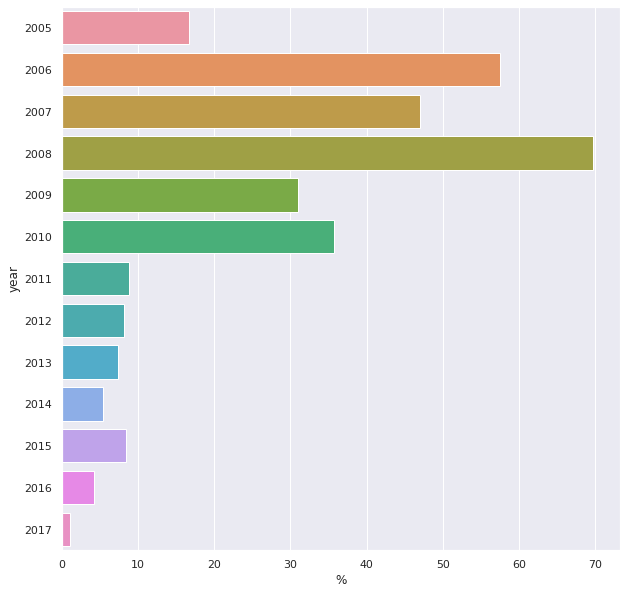

In [126]:
plt.figure(figsize=(10,10))
sns.barplot(y='year', x='%', orient='h' , data=df_sinrelatonull_by_year)

Se observa que previo al 2011 no solo la muestra de relatos es poco significativa en relación a los años posteriores sino que también presenta una gran cantidad de nulos en relación al total. Por otro lado, la candidad de relatos nulos en los años 2011-2016 se mueve entre  4.3-8.8 % del total.

# Resumen

La data objetivo es:

1. Se consideran solo los relatos entre el 2011-2016.
2. Se eliminan los registros sin relato, es decir, **sin_relato** nulo.

In [180]:
newdf = df[(df["year"]>=2011) & (df["year"]<=2016) &(df['sin_relato'].isnull()==False)]
newdf.sort_values("sin_fecha_siniestro", inplace=True)
newdf = newdf.rename(columns={"sin_relato":"text", "year":"epoch"})
newdf.reset_index(inplace=True, drop=True)
newdf["epoch"] = newdf["epoch"]-2011

/home/dgarrido/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
newdf[["text", "epoch"]].to_pickle("../../data/corpus.pkl")

In [2]:
corpus = pd.read_pickle("../../data/corpus.pkl")

In [4]:
corpus["epoch"] = corpus["epoch"]+2011

In [65]:
rob_year = corpus.groupby("epoch").agg({"text":"count"})
x = list(rob_year.index)
y = rob_year.text


fig = go.Figure()
fig.update_layout(template="plotly_white", showlegend=True, margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
        xaxis={'automargin': True}, yaxis={'automargin': True}, legend=None)
fig.add_trace(go.Bar(
    x= x,
    y= y,
    text=y,
    textposition='auto',
    width=0.6,
    showlegend = False
))

fig.update_traces(textfont_size=14)
fig.update_yaxes(range=[0, 1e4])
fig.update_xaxes(range=[2010.4, 2016.6])
fig.show()   

In [66]:
fig.write_image("../../tesis/img/ch4/robberies_aach.eps", scale=2)

# INE

In [6]:
acc = [33957, 42646, 44663, 55337, 55760, 61664, 56947, 59721, 62029, 63120, 61340]
rob = [13033, 18252, 20371, 26406, 29123, 33001, 30774, 29419, 31238, 30566, 29575]
time = range(2006, 2017)

In [53]:
fig = go.Figure()
fig.update_layout(template="plotly_white", showlegend=True, margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
        xaxis={'automargin': True}, yaxis={'automargin': True})
fig.add_trace(go.Scatter(
    x= list(time),
    y= acc,
    mode='lines',
    name="Robo de accesorios de vehículos o especies interior vehículos"
))
fig.add_trace(go.Scatter(
    x= list(time),
    y= rob,
    mode='lines',
    name="Robo de vehículo motorizado"
))

fig.update_layout(legend=dict(
    yanchor="top",
    y=-0.1,
    xanchor="left",
    x=0.01
))
fig.update_traces(textfont_size=14)
fig.update_yaxes(range=[0, 7e4])
fig.update_xaxes(range=[2005.5, 2016])
fig.show()   

In [54]:
fig.write_image("../../tesis/img/ch1/robberies.eps", scale=2)

In [74]:
corpus[corpus["epoch"]==2011]["text"][1]

'ESTABA ESTACIONADO EL LA CALLE ROTEMBURGO ENTRE NORUGA Y SEÑORA DEL ROSAIO  Y AL MOMENTO DE IR A BUSCAR EL AUTO SE DA CUENTA QUE EL VH NO SE ENCUETRA AL PARECER LO ROBARON. NO POSEEE LOS DOCUMENTOS DEL VH vh aparece pero con mulples daños e evaluar queda en manos del liquidador.'

In [78]:
corpus[corpus["epoch"]==2011]["text"].iloc[10]

'ME ENCONTRABA CARGANDO COMBUSTIBLE EN LA SHELL DE CARRASCAL CON WALKER MARTÍNEZ Y REPENTINAMENTE FUI ASALTADA EN FORMA VIOLENTA LLEVASE MI VEH (TENGO GRABACIÓN ). DAÑOS: ROBO DE MI VEH . LEIVA SE DERIVA A DON MARIO MEDINA .3 UF.DED/SUSANA@BUSSERVISE.CL'

In [81]:
corpus[corpus["epoch"]==2011]["text"].iloc[1000]

'TEXT : DEJO MI VEHICULO ESTACIONADO EN DICHO LUGAR AL VOLVER ME PERCATO QUE EL VEHICULO HABIA SIDO ROBADO  EL MISMO DIA DEL ROBO A LAS 20:00 SOY CONTACTADO POR CARABINEROS DE LA COMUNA DE EL BOSQUE LOS CUALES ME INFORMAN QUE HABIAN RECUPERADO MI VEHICULO EL CUAL PRESENTABA LOS SIGUIENTES DAÑOS : VIDRIO TRASERO DERECHO QUEBRADA  CHAPA DE CONTACTO FORZADA  PARACHOQUE DELANTERO DERECHO RAYADO  ALARMADESCONECTADA  OTROS DAÑOS EN EL SISTEMA ELECTRICO  ALARMA DE AIRBAGS ENCENDIDA  ROBO DE ESPECIES.'

In [89]:
corpus[corpus["text"].str.contains("apropiacion")]["text"].iloc[2]

'Descripción Siniestro: el dia 24 de abril se le arrendo el vh a luis Alberto Aguerto  el cual estuvo sin problemas pagando el arriendo  hasta el mes pasado que no pago mas y se le ha llamado en reiteradas veces y dice que va a venir a dejar el auto y no aparecel. por eso se realizo una denuncia por apropiacion indevida'

In [98]:
corpus[corpus["text"].str.contains("portonazo")]["text"].iloc[2]

'ammg  53966748    vh asegurado transitaba en calle copiapo alt. 750  en este punto sufro portonazo sujetos armados roban mi vh hoy a las 04.30am vh fue encontrado en sector de la pintana mi vh ahora esta siendo periciado.    daños por evaluar'

In [102]:
corpus[corpus["text"].str.contains("pistola")]["text"].iloc[2]

'PATENTE CRBL44 Siendo las 22:30 en la interseccion de san Alfonso con Claudio Gay  un individuo me obliga a bajar del vehiculo apuntandome con una pistola  de inmediato aparecen dos personas mas  las que me suben en la parte trasera del furgon donde constantemente me amenazan con dispararme  me bajan del vehiculo en un potrero cercano a la autopista del sol  teniendome boca abajo golpeandome  luego me colocan un pa?o en la cara perdiendo el conocimiento  al despertar desorientado me dirijo a car'